# Credit Risk Model

In [191]:
# Import the required libraries
import pandas as pd
from pathlib import Path
import numpy as np
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics, model_selection, svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Preparing the data 

In [143]:
# Reading loan_data.csv file into a DataFrame
loan_data = pd.read_csv("loan_data.csv")

# Change Column names 
loan_data = loan_data.rename(columns={"YOB":"Year of Birth",
                                      "NKID": "# of Children",
                                      "DEP": "# of Dependents",
                                      "SINC":"Spouse Income",
                                      "AES": "Employment Status",
                                      "DAINC": "Income",
                                      "RES":"Residential Status",
                                      "DHVAL": "Home_Value",
                                      "DMORT": "Mortgage Value",
                                      "DOUTM": "Outgoings(Rent/Mort)",
                                      "DOUTL": "Outgoings(Loans)",
                                      "DOUTHP" : "Outgoings(Hire)",
                                      "DOUTCC" : "Outgoings(Credit Cards)"})

# Review the DataFrame
display(loan_data)

,Year of Birth,# of Children,# of Dependents,PHON,Spouse Income,Employment Status,Income,Residential Status,Home_Value,Mortgage Value,Outgoings(Rent/Mort),Outgoings(Loans),Outgoings(Hire),Outgoings(Credit Cards),BAD
0,19.0,4.0,0.0,1,0.0,R,0.0,O,14464.0,4.0,0.0,0.0,0.0,0.0,0.0
1,41.0,2.0,0.0,1,0.0,P,36000.0,O,0.0,0.0,280.0,664.0,0.0,80.0,0.0
2,66.0,0.0,0.0,1,0.0,N,30000.0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.0,2.0,0.0,1,0.0,P,464.0,O,24928.0,8464.0,584.0,320.0,0.0,60.0,0.0
4,65.0,0.0,0.0,1,0.0,P,15000.0,P,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,52.0,4.0,1.0,1,0.0,V,37764.0,U,0.0,0.0,0.0,340.0,0.0,0.0,0.0
1221,56.0,3.0,0.0,1,1200.0,P,31500.0,O,6928.0,46464.0,784.0,256.0,0.0,0.0,1.0
1222,60.0,0.0,0.0,1,0.0,E,46800.0,O,11392.0,928.0,1144.0,680.0,0.0,108.0,0.0
1223,20.0,0.0,0.0,1,0.0,R,0.0,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
# Review the data types associated with the columns
loan_data.dtypes

Year of Birth              float64
# of Children              float64
# of Dependents            float64
PHON                         int64
Spouse Income              float64
Employment Status           object
Income                     float64
Residential Status          object
Home_Value                 float64
Mortgage Value             float64
Outgoings(Rent/Mort)       float64
Outgoings(Loans)           float64
Outgoings(Hire)            float64
Outgoings(Credit Cards)    float64
BAD                        float64
dtype: object

## Drop the "PHON" column from the dataset.
### This represents whether the applicant has a home phone, and is irrelevant to the dataset.

In [4]:
# Drop 'PHON' column from the DataFrame
loan_data = loan_data.drop(columns="PHON")

# Review the DataFrame
display(loan_data)

,Year of Birth,# of Children,# of Dependents,Spouse Income,Employment Status,Income,Residential Status,Home_Value,Mortgage Value,Outgoings(Rent/Mort),Outgoings(Loans),Outgoings(Hire),Outgoings(Credit Cards),BAD
0,19.0,4.0,0.0,0.0,R,0.0,O,14464.0,4.0,0.0,0.0,0.0,0.0,0.0
1,41.0,2.0,0.0,0.0,P,36000.0,O,0.0,0.0,280.0,664.0,0.0,80.0,0.0
2,66.0,0.0,0.0,0.0,N,30000.0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.0,2.0,0.0,0.0,P,464.0,O,24928.0,8464.0,584.0,320.0,0.0,60.0,0.0
4,65.0,0.0,0.0,0.0,P,15000.0,P,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,52.0,4.0,1.0,0.0,V,37764.0,U,0.0,0.0,0.0,340.0,0.0,0.0,0.0
1221,56.0,3.0,0.0,1200.0,P,31500.0,O,6928.0,46464.0,784.0,256.0,0.0,0.0,1.0
1222,60.0,0.0,0.0,0.0,E,46800.0,O,11392.0,928.0,1144.0,680.0,0.0,108.0,0.0
1223,20.0,0.0,0.0,0.0,R,0.0,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Encode the categorical variables and place the encoded data back into the dataframe
### The categorical variables are: "Employment Status", "Income", "Home_Value" and "Mortgage Value"

In [5]:
# Create the list of categorical variables
categorical = ["Employment Status", "Residential Status"]
# Display the list
display(categorical)

['Employment Status', 'Residential Status']

In [6]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [7]:
# Encode the categorical variables using OneHotEncoder
encoded_data = enc.fit_transform(loan_data[categorical])

In [8]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical)
)

# Display the DataFrame
display(encoded_df)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Employment Status_B,Employment Status_E,Employment Status_M,Employment Status_N,Employment Status_P,Employment Status_R,Employment Status_T,Employment Status_U,Employment Status_V,Employment Status_W,Employment Status_Z,Residential Status_F,Residential Status_N,Residential Status_O,Residential Status_P,Residential Status_U
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1221,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1222,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1223,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Add the original DataFrame's numerical variables to the encoded DataFrame

In [9]:
# Remove the categorical data from the original DataFrame and add the encoded data to it
loan_data = loan_data.drop(columns=categorical)
encoded_df = pd.concat([loan_data, encoded_df], axis=1)

# Review the new DataFrame
display(encoded_df)
encoded_df.dtypes

,Year of Birth,# of Children,# of Dependents,Spouse Income,Income,Home_Value,Mortgage Value,Outgoings(Rent/Mort),Outgoings(Loans),Outgoings(Hire),...,Employment Status_T,Employment Status_U,Employment Status_V,Employment Status_W,Employment Status_Z,Residential Status_F,Residential Status_N,Residential Status_O,Residential Status_P,Residential Status_U
0,19.0,4.0,0.0,0.0,0.0,14464.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,41.0,2.0,0.0,0.0,36000.0,0.0,0.0,280.0,664.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,66.0,0.0,0.0,0.0,30000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,51.0,2.0,0.0,0.0,464.0,24928.0,8464.0,584.0,320.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,65.0,0.0,0.0,0.0,15000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,52.0,4.0,1.0,0.0,37764.0,0.0,0.0,0.0,340.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1221,56.0,3.0,0.0,1200.0,31500.0,6928.0,46464.0,784.0,256.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1222,60.0,0.0,0.0,0.0,46800.0,11392.0,928.0,1144.0,680.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1223,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Year of Birth              float64
# of Children              float64
# of Dependents            float64
Spouse Income              float64
Income                     float64
Home_Value                 float64
Mortgage Value             float64
Outgoings(Rent/Mort)       float64
Outgoings(Loans)           float64
Outgoings(Hire)            float64
Outgoings(Credit Cards)    float64
BAD                        float64
Employment Status_B        float64
Employment Status_E        float64
Employment Status_M        float64
Employment Status_N        float64
Employment Status_P        float64
Employment Status_R        float64
Employment Status_T        float64
Employment Status_U        float64
Employment Status_V        float64
Employment Status_W        float64
Employment Status_Z        float64
Residential Status_F       float64
Residential Status_N       float64
Residential Status_O       float64
Residential Status_P       float64
Residential Status_U       float64
dtype: object

## Use the processed data to create the features (X) and target (y) datasets.

In [10]:
# Define the target set y using the "BAD" column
y = encoded_df[["BAD"]]

# Display a sample of y
display(y)

,BAD
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1220,0.0
1221,1.0
1222,0.0
1223,1.0


In [11]:
# Define the features set X
X = encoded_df.drop(columns="BAD")

# Review the DataFrame
display(X)

,Year of Birth,# of Children,# of Dependents,Spouse Income,Income,Home_Value,Mortgage Value,Outgoings(Rent/Mort),Outgoings(Loans),Outgoings(Hire),...,Employment Status_T,Employment Status_U,Employment Status_V,Employment Status_W,Employment Status_Z,Residential Status_F,Residential Status_N,Residential Status_O,Residential Status_P,Residential Status_U
0,19.0,4.0,0.0,0.0,0.0,14464.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,41.0,2.0,0.0,0.0,36000.0,0.0,0.0,280.0,664.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,66.0,0.0,0.0,0.0,30000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,51.0,2.0,0.0,0.0,464.0,24928.0,8464.0,584.0,320.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,65.0,0.0,0.0,0.0,15000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,52.0,4.0,1.0,0.0,37764.0,0.0,0.0,0.0,340.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1221,56.0,3.0,0.0,1200.0,31500.0,6928.0,46464.0,784.0,256.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1222,60.0,0.0,0.0,0.0,46800.0,11392.0,928.0,1144.0,680.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1223,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Split the features and target sets into training and testing datasets.

In [12]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Scale the features dataset to prepare for model

In [13]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a K-Means model to predict applicant segments
## Attempting to determine if there are any relationships within the features

In [14]:
# Scale the data for K-Means algorithm
encoded_df[["Income", "Spouse Income", "Home_Value", "Mortgage Value", "Outgoings(Rent/Mort)", "Outgoings(Loans)"]] = encoded_df[["Income", "Spouse Income", "Home_Value", "Mortgage Value", "Outgoings(Rent/Mort)", "Outgoings(Loans)"]] / 100

# Review the DataFrame
display(encoded_df)

,Year of Birth,# of Children,# of Dependents,Spouse Income,Income,Home_Value,Mortgage Value,Outgoings(Rent/Mort),Outgoings(Loans),Outgoings(Hire),...,Employment Status_T,Employment Status_U,Employment Status_V,Employment Status_W,Employment Status_Z,Residential Status_F,Residential Status_N,Residential Status_O,Residential Status_P,Residential Status_U
0,19.0,4.0,0.0,0.0,0.00,144.64,0.04,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,41.0,2.0,0.0,0.0,360.00,0.00,0.00,2.80,6.64,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,66.0,0.0,0.0,0.0,300.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,51.0,2.0,0.0,0.0,4.64,249.28,84.64,5.84,3.20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,65.0,0.0,0.0,0.0,150.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,52.0,4.0,1.0,0.0,377.64,0.00,0.00,0.00,3.40,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1221,56.0,3.0,0.0,12.0,315.00,69.28,464.64,7.84,2.56,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1222,60.0,0.0,0.0,0.0,468.00,113.92,9.28,11.44,6.80,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1223,20.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
# Initialize the K-Means model
model = KMeans(n_clusters=4)

In [16]:
# Fit the model
model.fit(encoded_df)

KMeans(n_clusters=4)

In [17]:
# Predict clusters
applicant_segments = model.predict(encoded_df)

# Display the data
display(applicant_segments)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [18]:
# Create a copy of the original DataFrame
encoded_df_predictions = encoded_df.copy()

# Create a new column with the predicted clusters
encoded_df_predictions["Applicant Segment"] = applicant_segments

# Display the DataFrame
display(encoded_df)

,Year of Birth,# of Children,# of Dependents,Spouse Income,Income,Home_Value,Mortgage Value,Outgoings(Rent/Mort),Outgoings(Loans),Outgoings(Hire),...,Employment Status_T,Employment Status_U,Employment Status_V,Employment Status_W,Employment Status_Z,Residential Status_F,Residential Status_N,Residential Status_O,Residential Status_P,Residential Status_U
0,19.0,4.0,0.0,0.0,0.00,144.64,0.04,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,41.0,2.0,0.0,0.0,360.00,0.00,0.00,2.80,6.64,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,66.0,0.0,0.0,0.0,300.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,51.0,2.0,0.0,0.0,4.64,249.28,84.64,5.84,3.20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,65.0,0.0,0.0,0.0,150.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,52.0,4.0,1.0,0.0,377.64,0.00,0.00,0.00,3.40,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1221,56.0,3.0,0.0,12.0,315.00,69.28,464.64,7.84,2.56,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1222,60.0,0.0,0.0,0.0,468.00,113.92,9.28,11.44,6.80,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1223,20.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
# Plot the scatter with x="Income" and y="Year of Birth"
encoded_df_predictions.hvplot.scatter(x="Income", y="Year of Birth", by="Applicant Segment")

:NdOverlay   [Applicant Segment]
   :Scatter   [Income]   (Year of Birth)

## Conclusion:
### There are no identifiable groups within the data.  Based on our research, a K-Means model would be more suitable for unsupervised learning.  

# Creating a Neural Network model using Keras

In [20]:
# Create the neuron instance
neuron = Sequential()

2022-07-12 19:55:37.508337: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
# Create the variables for the model
number_inputs = 27
number_hidden_nodes = 5

# Add the variables to the neuron
neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [22]:
# Create the variables for the output layer
number_classes = 1

# Add the variables to the neuron
neuron.add(Dense(units=number_classes, activation="sigmoid"))

In [23]:
# Display model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 140       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the neural network
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Fit the model with the encoded DataFrame
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
29/29 [==============================] - 0s 917us/step - loss: 1.0632 - accuracy: 0.3758
Epoch 2/100
29/29 [==============================] - 0s 6ms/step - loss: 0.9680 - accuracy: 0.4237
Epoch 3/100
29/29 [==============================] - 0s 1ms/step - loss: 0.8906 - accuracy: 0.4477
Epoch 4/100
29/29 [==============================] - 0s 1ms/step - loss: 0.8308 - accuracy: 0.4630
Epoch 5/100
29/29 [==============================] - 0s 1ms/step - loss: 0.7832 - accuracy: 0.5131
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 0.7453 - accuracy: 0.5534
Epoch 7/100
29/29 [==============================] - 0s 998us/step - loss: 0.7157 - accuracy: 0.5752
Epoch 8/100
29/29 [==============================] - 0s 942us/step - loss: 0.6919 - accuracy: 0.5926
Epoch 9/100
29/29 [==============================] - 0s 960us/step - loss: 0.6739 - accuracy: 0.6024
Epoch 10/100
29/29 [==============================] - 0s 941us/step - loss: 0.6589 - accuracy: 0.6166

# Plot the loss and accuracy

<AxesSubplot:>

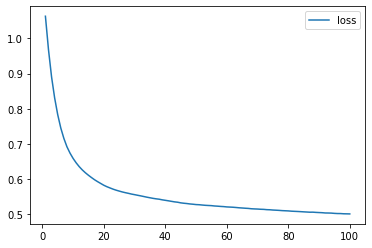

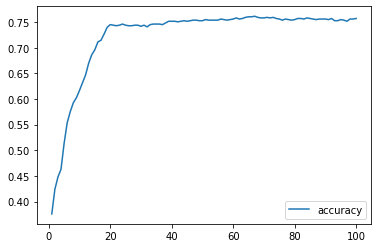

In [26]:
# Create a DataFrame with the history dictionary
dictionary = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
dictionary.plot(y="loss")

# Plot the accuracy
dictionary.plot(y="accuracy")

# Evaluating the Neural Network model

In [27]:
# Evaluate the model using testing data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

10/10 - 0s - loss: 0.5698 - accuracy: 0.7492 - 118ms/epoch - 12ms/step
Loss: 0.5698222517967224, Accuracy: 0.7491856813430786


## Improve the model- the data is non-linear, so a deep-learning model would likely be better for predicting credit risk.

# Creating a deep learning model with Keras

In [28]:
# Define the model - deep neural net with two hidden layers
number_input_features = 27
hidden_nodes_layer1 = 22
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 6

# Create a sequential neural network model
nn = Sequential()

# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="tanh"))

# Add the third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))


# Add the output layer
nn.add(Dense(units=1, activation="linear"))

In [29]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
deep_net_model = nn.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
29/29 [==============================] - 0s 941us/step - loss: 0.3729 - mse: 0.3729
Epoch 2/100
29/29 [==============================] - 0s 955us/step - loss: 0.2247 - mse: 0.2247
Epoch 3/100
29/29 [==============================] - 0s 918us/step - loss: 0.2005 - mse: 0.2005
Epoch 4/100
29/29 [==============================] - 0s 962us/step - loss: 0.1902 - mse: 0.1902
Epoch 5/100
29/29 [==============================] - 0s 938us/step - loss: 0.1840 - mse: 0.1840
Epoch 6/100
29/29 [==============================] - 0s 952us/step - loss: 0.1797 - mse: 0.1797
Epoch 7/100
29/29 [==============================] - 0s 961us/step - loss: 0.1766 - mse: 0.1766
Epoch 8/100
29/29 [==============================] - 0s 929us/step - loss: 0.1738 - mse: 0.1738
Epoch 9/100
29/29 [==============================] - 0s 1000us/step - loss: 0.1722 - mse: 0.1722
Epoch 10/100
29/29 [==============================] - 0s 934us/step - loss: 0.1711 - mse: 0.1711
Epoch 11/100
29/29 [==================

<AxesSubplot:>

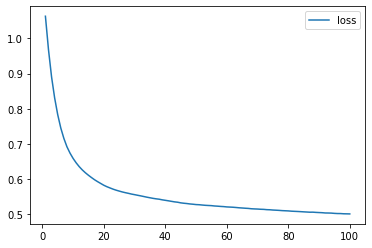

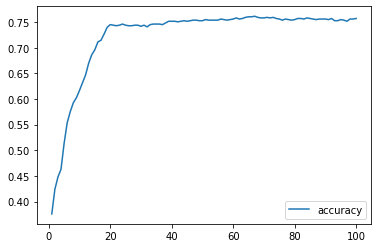

In [30]:
# Create a DataFrame with the history dictionary
dictionary = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
dictionary.plot(y="loss")

# Plot the accuracy
dictionary.plot(y="accuracy")

In [31]:
# Evaluate the model using testing data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

10/10 - 0s - loss: 0.2702 - mse: 0.2702 - 95ms/epoch - 10ms/step
Loss: 0.27021244168281555, Accuracy: 0.27021244168281555


AttributeError: 'Sequential' object has no attribute 'decision_function'

## Logistic Regression Model

### Create a model using Logistic Regression to determine if the previous models can be approved upon

In [89]:
# Save the values of the "BAD" column to compare against the model's predictions
actual = encoded_df["BAD"]

# Change the series into an array
actual = np.array(actual)

In [90]:
# Initialize the model
log_reg_model = LogisticRegression()

In [91]:
# Fit the logistic regression model
log_reg_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
# Generate predictions from the model that was just fit
predictions = log_reg_model.predict(X_train)

# Create a list from the y_train values to create an array
list = y_train.values.tolist()

# Change the list to an array
actual = np.array(list)

# Change the array from n-dimensions to 1-dimension
actual = np.ravel(actual)

# Convert the predictions and actual values into a DataFrame
results = pd.DataFrame({"Prediction": predictions, "Actual": actual})

# Display the DataFrame
results

,Prediction,Actual
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
913,0.0,0.0
914,0.0,0.0
915,0.0,0.0
916,0.0,0.0


In [140]:
# Apply the fitted model to the testing dataset
testing_predictions = log_reg_model.predict(X_test)

# Change y_test into an array
targets = np.array(y_test)

# Change "targets" array from n-dimensions to 1-dimension
targets = np.ravel(targets)

# Save the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions,
    "Testing Data Actual Targets": targets})
results_df

,Testing Data Predictions,Testing Data Actual Targets
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
302,0.0,0.0
303,0.0,0.0
304,0.0,0.0
305,0.0,1.0


In [192]:
# Calculate the model's accuracy on the test dataset
print(accuracy_score(targets, testing_predictions))

0.742671009771987


In [184]:
# Calculate the probability scores of each point in the training set
y_train_score = log_reg_model.decision_function(X_train)
# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)
# Calculate the probability scores of each point in the test set
y_test_score = log_reg_model.decision_function(X_test)
# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

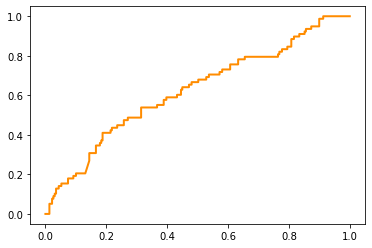

In [195]:
plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label='ROC curve')


TypeError: unhashable type: 'DataFrame'

['Year of Birth',
 '# of Children',
 '# of Dependents',
 'Spouse Income',
 'Income',
 'Home_Value',
 'Mortgage Value',
 'Outgoings(Rent/Mort)',
 'Outgoings(Loans)',
 'Outgoings(Hire)',
 'Outgoings(Credit Cards)',
 'BAD',
 'Employment Status_B',
 'Employment Status_E',
 'Employment Status_M',
 'Employment Status_N',
 'Employment Status_P',
 'Employment Status_R',
 'Employment Status_T',
 'Employment Status_U',
 'Employment Status_V',
 'Employment Status_W',
 'Employment Status_Z',
 'Residential Status_F',
 'Residential Status_N',
 'Residential Status_O',
 'Residential Status_P',
 'Residential Status_U']

,0
0,Year of Birth
1,# of Children
2,# of Dependents
3,Spouse Income
4,Income
5,Home_Value
6,Mortgage Value
7,Outgoings(Rent/Mort)
8,Outgoings(Loans)
9,Outgoings(Hire)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


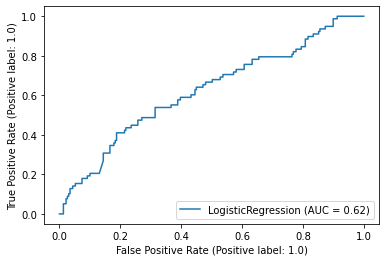

In [188]:
# Create a plot of the ROC curve for the Logistic Regression Model
metrics.plot_roc_curve(log_reg_model, X_test, y_test)

# Display the plot
plt.show()


In [176]:
y_pred_keras = neuron.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

fpr_keras, tpr_keras, thresholds_keras

10/10 [==============================] - 0s 863us/step


(array([0.        , 0.01746725, 0.02183406, 0.02183406, 0.02620087,
        0.02620087, 0.0349345 , 0.0349345 , 0.03930131, 0.03930131,
        0.04366812, 0.05240175, 0.05676856, 0.05676856, 0.06113537,
        0.069869  , 0.08296943, 0.09170306, 1.        ]),
 array([0.        , 0.05128205, 0.05128205, 0.06410256, 0.06410256,
        0.1025641 , 0.1025641 , 0.11538462, 0.11538462, 0.15384615,
        0.15384615, 0.15384615, 0.15384615, 0.16666667, 0.16666667,
        0.16666667, 0.23076923, 0.23076923, 1.        ]),
 array([2.0000000e+00, 1.0000000e+00, 9.9998415e-01, 3.5465658e-02,
        3.3184007e-02, 2.7813198e-04, 1.0845037e-05, 1.0759235e-05,
        9.2043238e-06, 4.3383776e-07, 3.1684183e-07, 2.8419404e-07,
        2.1755588e-07, 1.8384907e-07, 1.4787152e-07, 1.1893452e-07,
        9.5660127e-08, 3.7667204e-18, 0.0000000e+00], dtype=float32))

In [181]:
y_pred_nn = nn.predict(X_test)
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_nn)
auc_nn = auc(fpr_nn, tpr_nn)


10/10 [==============================] - 0s 952us/step


In [182]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

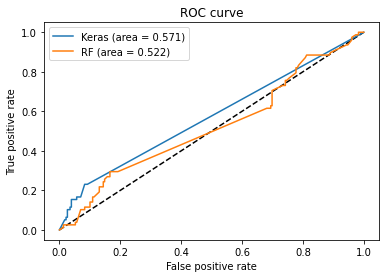

In [183]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_nn, tpr_nn, label='RF (area = {:.3f})'.format(auc_nn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()